# Hand Written Digit Classification with Keras

We learnt how CNNs are extremely useful in working with images data. In this series of assignments, we will experiment with different types of model to better understand the workings and advantages of CNNs.


## Setting

* We will be working with MNIST dataset, which is a labeled images of 0-9 numbers.
* We will be using keras library to carry out modeling and training of neural networks and CNNs

In [20]:
# Loading necessary packages

import numpy

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
K.set_image_dim_ordering('th')

import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
# fix random seed for reproducibility
seed = 42
numpy.random.seed(seed)

## Classify MNIST dataset using an ANN and CNN

## 1. Write `load_mnist` function:

- The function loads mnist dataset from keras library
- It takes in no parameters
- Returns 
    - X_train, X_test, y_train, y_test (Numpy arrays for training, testing; any format acceptable by sklearn, keras will work)

In [22]:
def load_mnist():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    return X_train, X_test, y_train, y_test

In [23]:
X_train, X_test, y_train, y_test = load_mnist()

In [24]:
X_train.shape

(60000, 28, 28)

## 2. Write `plot_mnist` function:

- The function plots randomly picked 4 images from the dataset
- It takes in no parameters
- Returns
    - The function plots 4 images in 2x2 fashion in a single figure
    - also matplotlib object of the figure
   

In [5]:
def plot_mnist():
    plt.figure(figsize=(10,10))
    plt.subplot(221)
    plt.imshow(X_train[23], cmap=plt.get_cmap('gray'))
    plt.subplot(222)
    plt.imshow(X_train[788], cmap=plt.get_cmap('gray'))
    plt.subplot(223)
    plt.imshow(X_train[456], cmap=plt.get_cmap('gray'))
    plt.subplot(224)
    plt.imshow(X_train[234], cmap=plt.get_cmap('gray'))
    plt.show()
    return plt

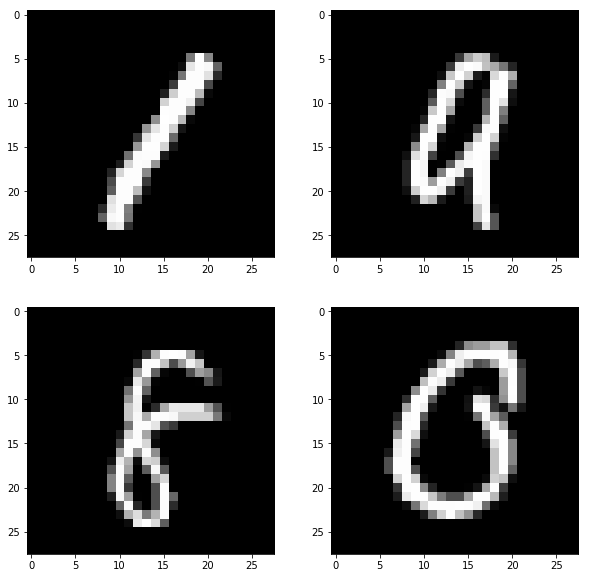

In [6]:
a = plot_mnist()

## 3. Write `flatten_normalise` function:

- Next, we want to convert our feature set into a format which can be used by the ANN
- The function flattens the dataset and normalises feature values from 0-255 to 0-1
- Accepts feature matrix
- Returns 
    - flattened and normalised feature matrix, where each row represents 1 observation/image.
    
    
Hint: Observe how each datapoint is arranged in the feature matrix.

In [7]:
def flatten_normalise(X):
    num_pixels = X.shape[1] * X.shape[2]
    return X.reshape(X.shape[0], num_pixels).astype('float32')/255

In [8]:
X_train1 = flatten_normalise(X_train)
X_test1 = flatten_normalise(X_test)

## 4. Write `OHE` function:

- Next, we want to convert our target set into a OHE matrix
- The function one-hot-encodes the target variable
- Accepts numpy matrix for target variable
- Returns 
    - One Hot Encoded target variable

In [9]:
def OHE(y):
    return np_utils.to_categorical(y)

In [10]:
y_train1 = OHE(y_train)
y_test1 = OHE(y_test)

## 5. Write `baseline_model` function

- Now that we have converted both the input fetures and target variable in the correct format, we can go ahead and build the baseline keras model.
- We want to build a neural network with following architecture
    - Layer 1: Input layer with `relu` activation function and `normal` kernel intializer
    - Layer 2: Output layer with `softmax` activation function and `normal` kernel intializer
    - Loss function: `categorical_crossentropy`
    - optimizer: `adam`
    - Metric: `accuracy`
    - 
- Write a function `baseline_model` that
    - Accepts:
        - Number of input features (int)
        - Number of output classes (int)
        - X_train, X_test (Numpy arrays with dimension `(m x input_feature_size)` for training, testing; any format acceptable by sklearn, keras will work) (m is number of observations)
        - y_train, y_test (Numpy arrays with dimension `(m x num_classes)` for training, testing; any format acceptable by sklearn, keras will work) (m is number of observations)
        - number of epochs to run the model for (int) (default 10)
    - Returns:
        - Keras neural network model trained on X_train, y_train and validated on X_test, y_test

In [11]:
def baseline_model(input_feature_size, num_classes, X_train, X_test, y_train, y_test, epochs=10):
    
    model = Sequential()
    model.add(Dense(input_feature_size, input_dim=input_feature_size, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=200, verbose=1)
    return model

In [12]:
model = baseline_model(784, 10, X_train1, X_test1, y_train1, y_test1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s - loss: 0.2760 - acc: 0.9215 - val_loss: 0.1416 - val_acc: 0.9582
Epoch 2/10
60000/60000 [==============================] - 11s - loss: 0.1092 - acc: 0.9688 - val_loss: 0.0937 - val_acc: 0.9713
Epoch 3/10
60000/60000 [==============================] - 10s - loss: 0.0714 - acc: 0.9787 - val_loss: 0.0784 - val_acc: 0.9765
Epoch 4/10
60000/60000 [==============================] - 10s - loss: 0.0493 - acc: 0.9859 - val_loss: 0.0683 - val_acc: 0.9798
Epoch 5/10
60000/60000 [==============================] - 10s - loss: 0.0358 - acc: 0.9896 - val_loss: 0.0647 - val_acc: 0.9790
Epoch 6/10
60000/60000 [==============================] - 12s - loss: 0.0262 - acc: 0.9929 - val_loss: 0.0602 - val_acc: 0.9814
Epoch 7/10
60000/60000 [==============================] - 12s - loss: 0.0191 - acc: 0.9957 - val_loss: 0.0645 - val_acc: 0.9801
Epoch 8/10
60000/60000 [==============================

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Final evaluation of the model
scores = model.evaluate(X_test1, y_test1, verbose=0)
print("Baseline Accuracy: {:.2f}%".format(scores[1]*100))
print("Baseline Error: {:.2f}%".format(100-scores[1]*100))

Baseline Accuracy: 97.90%
Baseline Error: 2.10%


## 6. Write `reshape_normalize` function

- Next, we want to convert our feature set into a format which can be used by the CNN
- Theano backed keras accepts feature in NCHW shape where,
    N: number of observations
    C: number of channels in the image
    H: height of the image
    W: width of the image
- The function also normalises feature values from 0-255 to 0-1
- Write a function `reshape_normalize` that
    - Accepts original feature matrix in NxHxW format
- Returns 
    - NCHW reshaped and normalised feature matrix

In [15]:
def reshape_normalise(X):
    X =  X.reshape(X.shape[0], 1, 28, 28).astype('float32')
    X = X/255
    return X

In [16]:
# normalize inputs from 0-255 to 0-1
X_train2 = reshape_normalise(X_train)
X_test2 = reshape_normalise(X_test)

## 7. Write `cnn_model` function

- Now that we have converted both the input fetures and target variable in the correct format, we can go ahead and build the baseline keras model.
- We want to build a neural network with following architecture
    - Input Convolution Layer with 30 kernels of size 5x5
    - Layer 2: Max Pooling with window size 2x2
    - Layer 3: Convolution layer with 15 kernels of size 3x3
    - Layer 4: Max Pooling with window size 2x2
    - Layer 5: Dropout Layer
    - Layer 6: Dense Layer with 128 neurons
    - Layer 7: Dense Layer with 50 neurons
    - Output Layer with neurons equal to `num_classes` 
    - Loss function: `categorical_crossentropy`
    - optimizer: `adam`
    - Metric: `accuracy`

Note: Use appropriate activation functions for layers that require them.

- Write a function `cnn_model` that
    - Accepts:
        - Number of output classes (int)
        - X_train, X_test (Numpy arrays with dimension `(m x 1 x 28 x 28)` for training, testing; any format acceptable by sklearn, keras will work) (m is number of observations)
        - y_train, y_test (Numpy arrays with dimension `(m x num_classes)` for training, testing; any format acceptable by sklearn, keras will work) (m is number of observations)
        - number of epochs to run the model for (int) (default 10)
        - dropout ratio (float) (default 0.2)
    - Returns:
        - Keras neural network model trained on X_train, y_train and validated on X_test, y_test

In [26]:
# define the larger model
def cnn_model(num_classes, X_train, X_test, y_train, y_test, epochs=5, droput_ratio=0.2):
    
    # create model
    model = Sequential()
    model.add(Convolution2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Convolution2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=200, verbose=2)
    return model

In [27]:
# build the model
large_cnn_model = cnn_model(10, X_train2, X_test2, y_train1, y_test1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
212s - loss: 0.3562 - acc: 0.8920 - val_loss: 0.0838 - val_acc: 0.9746
Epoch 2/5
207s - loss: 0.0974 - acc: 0.9703 - val_loss: 0.0543 - val_acc: 0.9824
Epoch 3/5
214s - loss: 0.0696 - acc: 0.9783 - val_loss: 0.0404 - val_acc: 0.9867
Epoch 4/5
235s - loss: 0.0552 - acc: 0.9832 - val_loss: 0.0346 - val_acc: 0.9889
Epoch 5/5
217s - loss: 0.0494 - acc: 0.9843 - val_loss: 0.0283 - val_acc: 0.9902


In [28]:
# Final evaluation of the model
large_cnn_scores = large_cnn_model.evaluate(X_test2, y_test1, verbose=0)
print("Large CNN Accuracy: {:.2f}%".format(large_cnn_scores[1]*100))
print("Large CNN Error: {:.2f}%".format(100-large_cnn_scores[1]*100))

Large CNN Accuracy: 99.02%
Large CNN Error: 0.98%
